In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import time
import tensorflow_addons as tfa

c:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

In [2]:
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tkinter import Tk
from tkinter.filedialog import askdirectory

# Hide the main Tkinter window
Tk().withdraw()
# Print the selected folder
print(f"Please select the folder from the pop up, it will appear after you minimize this window:")
# Ask the user to select the folder with custom text
home_folder = askdirectory(title="Select the Project_submission folder")

# Check if a folder was selected
if not home_folder:
    print("No folder selected. Exiting.")
    exit()

# Print the selected folder or use it in your script
print(f"Selected folder: {home_folder}")


In [ ]:
import os
first_folder = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/7 Age Groups")

def walk_through_dir(dir_path):
  count_images = 0
  for dirpath, dirnames, filenames in os.walk(dir_path):
    count_images += len(filenames)
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  print(f"Total Images : {count_images}")
walk_through_dir(first_folder)

There are 3 directories and 0 images in 'Cattle_DataSet_4_Classes_yolo_dataset'.
There are 4 directories and 0 images in 'Cattle_DataSet_4_Classes_yolo_dataset\test'.
There are 0 directories and 148 images in 'Cattle_DataSet_4_Classes_yolo_dataset\test\Group 1 ( 1 to 5 years)'.
There are 0 directories and 138 images in 'Cattle_DataSet_4_Classes_yolo_dataset\test\Group 2 ( 5.1 to 9 years)'.
There are 0 directories and 107 images in 'Cattle_DataSet_4_Classes_yolo_dataset\test\Group 3 ( 9.1 to 13 years)'.
There are 0 directories and 56 images in 'Cattle_DataSet_4_Classes_yolo_dataset\test\Group 4 ( 13.1 and above)'.
There are 4 directories and 0 images in 'Cattle_DataSet_4_Classes_yolo_dataset\train'.
There are 0 directories and 670 images in 'Cattle_DataSet_4_Classes_yolo_dataset\train\Group 1 ( 1 to 5 years)'.
There are 0 directories and 622 images in 'Cattle_DataSet_4_Classes_yolo_dataset\train\Group 2 (5.1 to 9 years)'.
There are 0 directories and 475 images in 'Cattle_DataSet_4_Class

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE =(224 , 224)
BATCH_SIZE=32

train_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/7 Age Groups/train")
test_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/7 Age Groups/test")
val_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/7 Age Groups/val")

train_dir = os.path.join(home_folder, train_dir)
test_dir =  os.path.join(home_folder, test_dir)
val_dir = os.path.join(home_folder, val_dir)

train_datagen = ImageDataGenerator( rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

print("Training images:")
train_data =train_datagen.flow_from_directory(train_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode ="categorical",
                                              shuffle = True

                                              )
print("Training images:")
val_data =val_datagen.flow_from_directory(val_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode ="categorical",
                                              shuffle = True)
print("Testing images:")
test_data =test_datagen.flow_from_directory(test_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = 1,
                                              class_mode ="categorical",
                                              shuffle = False)

Training images:
Found 2008 images belonging to 4 classes.
Training images:
Found 426 images belonging to 4 classes.
Testing images:
Found 449 images belonging to 4 classes.


In [5]:
# Getting Class Names
# Define class labels
labels = test_data.class_indices.keys()
labels = list(labels)
class_names = labels
print(f"Class Names : {class_names}")

Class Names : ['Group 1 ( 1 to 5 years)', 'Group 2 ( 5.1 to 9 years)', 'Group 3 ( 9.1 to 13 years)', 'Group 4 ( 13.1 and above)']


In [ ]:

def create_tensorboard_callback(experiment_name, dir_name = os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/LogsDirectory")):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history , file_name , save_dir = os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/Accuracy_Curves")):
    # Get training and validation loss values
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get training and validation accuracy values
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir ,file_name))
    plt.show()





In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix , classification_report
import seaborn as sns

def evaluate_multiclass(y_true, y_pred , labels):
    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Compute recall
    recall = recall_score(y_true, y_pred, average='weighted')

    report = classification_report(y_true, y_pred, output_dict=True)


    return accuracy, precision, recall , report

def plot_confusion_matrix(cm, labels, File_Name,  save_dir=os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/ConfusionMatrix")):
    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.matshow(cm, cmap='Blues')

    # Add color bar
    plt.colorbar(cax)

    # Set labels
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)

    # Rotate x-axis labels
    ax.xaxis.set_tick_params(rotation=45)

    # Set labels at ticks
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    # Display values in each cell
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    # Save plot
    plt.savefig(os.path.join(save_dir, File_Name))

    # Show plot
    plt.show()




In [9]:
def load_and_prep_image(filename, img_shape=224, scale=False):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img , channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
# # Make preds on a series of random images
# import os
# import random

# def Some_Predictions_on_Test_Data(test_dir , class_names , model , scale ,file_name , save_dir ="Model_Results/Some_Predictions" ):
#         plt.figure(figsize=(17,10))
#         for i in range(6):
#           # Choose a random image from a random class
#           class_name = random.choice(class_names)
#           filename = random.choice(os.listdir(test_dir + "/" + class_name))
#           filepath = test_dir + class_name + "/" + filename

#           # Load the image and make predictions
#           img = load_and_prep_image(filepath, scale=True) # don't scale images for EfficientNet predictions
#           pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
#           pred_class = class_names[pred_prob.argmax()] # find the predicted class


#           new_image = img

#           plt.subplot(3,2, i+1)
#           plt.imshow(new_image)
#           if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
#             title_color = "g"
#           else:
#             title_color = "r"
#           plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
#           plt.axis(False)
#         plt.savefig(os.path.join(save_dir , file_name))

In [ ]:
def Ploting_Confusion_matrix( test_data , model,File_Name ,save_dir = os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/ConfusionMatrix")):
    # Example usage:
    # Generate example data

    y_true = test_data.classes
    pred_prob = model.predict(test_data)
    y_pred = pred_prob.argmax(axis = 1)
    # Define class labels
    labels = test_data.class_indices.keys()
    labels = list(labels)

    # Evaluate model
    accuracy, precision, recall , report  = evaluate_multiclass(y_true, y_pred , labels )

    # Print evaluation metrics
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    report = pd.DataFrame(report).transpose()
    report.to_csv(os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/Model_Results/ClassificationReport/" + File_Name))


    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, labels, File_Name , save_dir)

    return accuracy , precision , recall

In [12]:
import pandas as pd

def append_row_to_dataframe(data, csv_filename):
    """
    Append a row to a DataFrame and save it to a CSV file.

    Args:
    - data: a dictionary where keys are column names and values are the corresponding values for the new row
    - csv_filename: the filename for the CSV file to append the row
    """
    try:
        df = pd.read_csv(csv_filename)
    except FileNotFoundError:
        print("CSV file not found.")
        return
    data = pd.DataFrame(data)
    df = pd.concat([df,data])
    print(df)
    df.to_csv(csv_filename, index=False)




In [ ]:

import tensorflow as tf
import time
from tensorflow.keras import layers, models, callbacks

from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0

def create_cnn_model(input_shape, num_classes):


    base_model = EfficientNetV2B0(input_shape = (224 ,224 , 3), include_top = False, weights = 'imagenet')
    base_model.trainable = True

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Add a final softmax layer with 4 node for classification output
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model_eff = create_cnn_model(input_shape, num_classes)

# Compile the model
model_eff.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/Model_checkpoints/model_eff.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback(experiment_name="Model_eff")
# Train the model with callbacks

# Start time
start_time = time.time()
history_eff = model_eff.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback , early_stopping])

# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# # Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 2: {training_time} seconds\n")

# Print model summary
model_eff.summary()
model_eff.save(os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/Models/Model_files/model_eff"))

24274472/24274472 [==============================] - 4s 0us/step
Saving TensorBoard log files to: Model_Results/LogsDirectory/Model_eff
Epoch 1/80
63/63 [==============================] - 115s 2s/step - loss: 1.5502 - accuracy: 0.3780 - val_loss: 1.1619 - val_accuracy: 0.5094
Epoch 2/80
63/63 [==============================] - 98s 2s/step - loss: 1.2511 - accuracy: 0.4801 - val_loss: 1.0543 - val_accuracy: 0.5563
Epoch 3/80
63/63 [==============================] - 98s 2s/step - loss: 1.1106 - accuracy: 0.5448 - val_loss: 0.9588 - val_accuracy: 0.6009
Epoch 4/80
63/63 [==============================] - 94s 1s/step - loss: 1.0297 - accuracy: 0.5692 - val_loss: 0.9525 - val_accuracy: 0.5728
Epoch 5/80
63/63 [==============================] - 96s 2s/step - loss: 0.9941 - accuracy: 0.5762 - val_loss: 0.9283 - val_accuracy: 0.6033
Epoch 6/80
63/63 [==============================] - 92s 1s/step - loss: 0.9489 - accuracy: 0.5946 - val_loss: 0.9125 - val_accuracy: 0.5939
Epoch 7/80
63/63 [=====

INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_eff\assets


INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_eff\assets


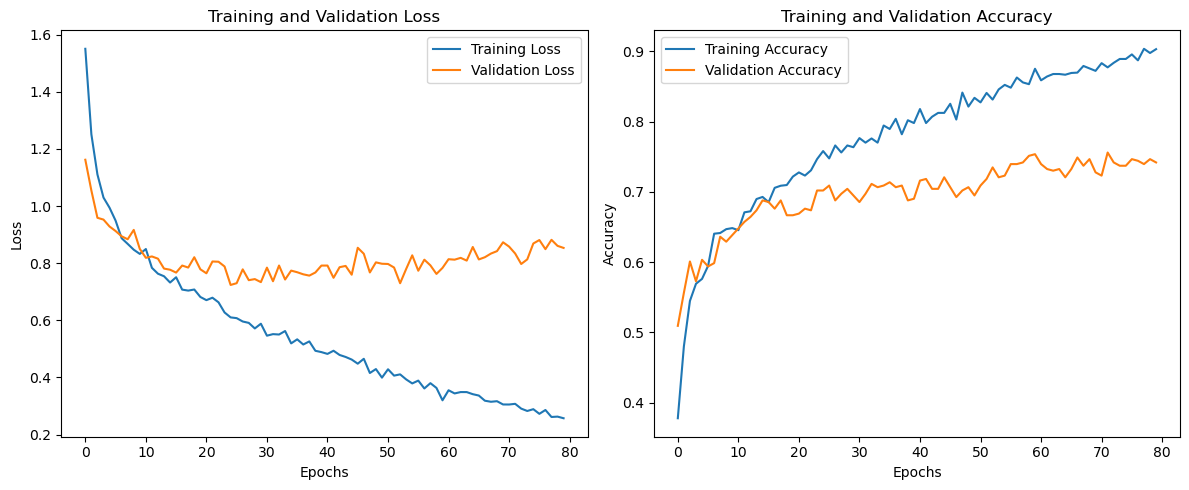

In [17]:
plot_loss_curves(history_eff , 'model_eff' )

In [ ]:
model_eff = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/Models/Model_files/model_eff"))
model_eff.load_weights(os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/Model_checkpoints/model_eff.h5"))
model_eff.save(os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/Model_files/model_eff.h5"))

449/449 [==============================] - 22s 45ms/step
Accuracy: 0.69
Precision: 0.70
Recall: 0.69


C:\Users\Welcome\AppData\Local\Temp\ipykernel_19416\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_19416\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


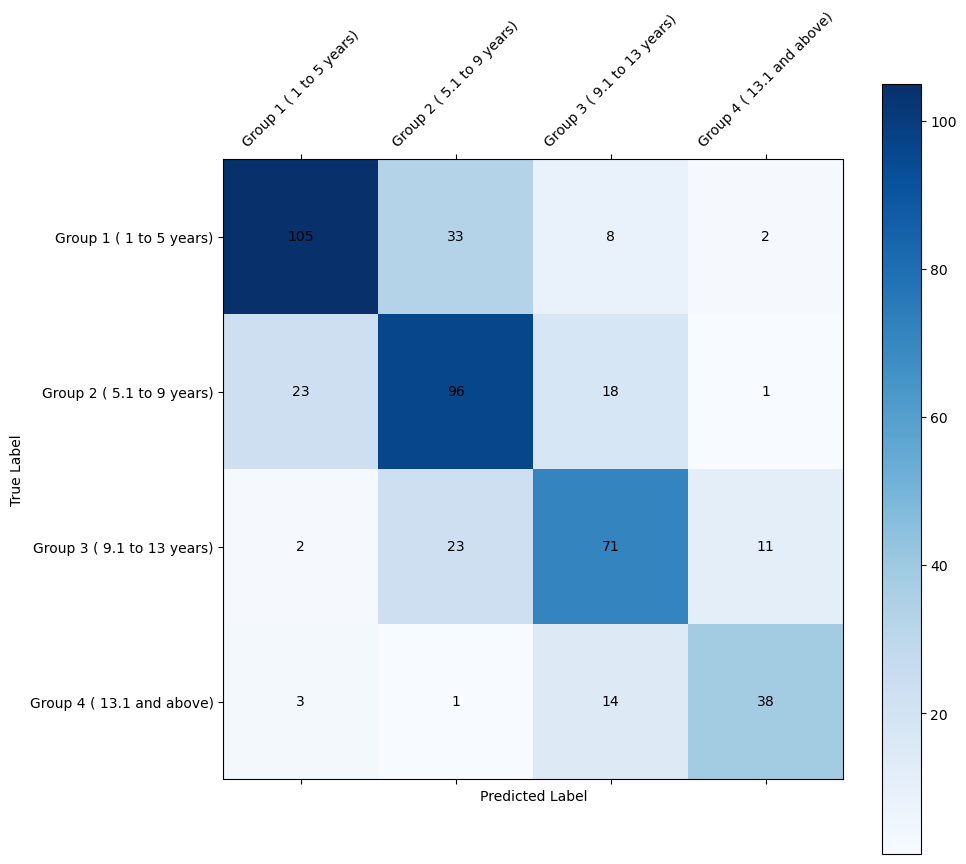

In [19]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model_eff , 'model_eff')

In [ ]:
# Example data to append
num_epochs_trained = len(history_eff.history['loss'])
new_row_data = {"Model_name": ["Model Efficient"], "accuracy": [accuracy], "precision":[ precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename = os.path.join(home_folder,"MODEL TRAINING/2/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)


                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   
1                        Inceptionv3  0.737194   0.754982  0.737194   
2                    InceptionResnet  0.701559   0.704288  0.701559   
3                         Resnet50v2  0.657016   0.665964  0.657016   
4                            VGG Net  0.683742   0.704208  0.683742   
5                          MobileNet  0.728285   0.727227  0.728285   
6                           DenseNet  0.708241   0.722879  0.708241   
0                    Model Efficient  0.690423   0.696648  0.690423   

   training_time  epochs  
0    3887.304280      41  
1    6881.741600      73  
2    4947.767156      50  
3    3366.548256      34  
4    3785.072678      38  
5    3467.137447      35  
6    4535.210918      45  
0    7462.752462      80  
